In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz


In [2]:
df = pd.read_csv("job_descriptions.csv")

In [3]:
df['Salary_clean'] = (
    df['Salary Range']
    .astype(str)
    .str.replace('[^0-9]', '', regex=True)
    .astype(float)
)


In [4]:
df['Experience_clean'] = (
    df['Experience']
    .astype(str)
    .str.extract('(\d+)')
    .astype(float)
)


In [5]:
df['Job Posting Date'] = pd.to_datetime(
    df['Job Posting Date'],
    errors='coerce'
)


In [6]:
filtered_df = df[
    (df['Work Type'] == 'Intern') &
    (df['latitude'] < 10) &
    (~df['Country'].str.startswith(('A','B','C','D'), na=False)) &
    (~df['Job Title'].str.contains(' ', na=False)) &    
    (df['Job Title'].str.len() < 10) &
    (df['Company Size'] < 50000) &
    (df['Salary_clean'] > 8000) &
    (df['Experience_clean'] % 2 == 0) &
    (df['Job Posting Date'].dt.year.between(2021, 2023)) &
    (df['Contact Person'].str.contains('e', case=False, na=False))
]


In [7]:
PREVIEW_MODE = True   

ist = pytz.timezone("Asia/Kolkata")
current_time = datetime.now(ist).time()

start_time = datetime.strptime("15:00", "%H:%M").time()
end_time   = datetime.strptime("17:00", "%H:%M").time()


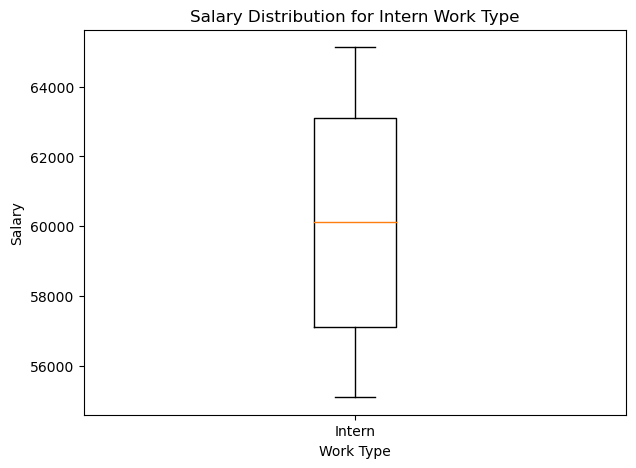

In [8]:
if filtered_df.empty:
    print("No records satisfy all conditions.")

elif PREVIEW_MODE or (start_time <= current_time <= end_time):

    plt.figure(figsize=(7, 5))
    plt.boxplot(
        filtered_df['Salary_clean'],
        labels=['Intern']
    )

    plt.xlabel('Work Type')
    plt.ylabel('Salary')
    plt.title('Salary Distribution for Intern Work Type')
    plt.show()

else:
    print("Chart is visible only between 3 PM and 5 PM IST.")
